In [1]:
#Install gdown library 
!pip install gdown


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
#Download file in Jupyter notebook
import gdown

file_id_1 = "1yoSOqfx5RR-N-D7uE1kwu_PVNoA5-GC4"
url_1 = f"https://drive.google.com/uc?id={file_id_1}"

supplemental_data_path = 'Supplemental Predictive Maintenance Dataset.xlsx'  

gdown.download(url_1,supplemental_data_path, quiet=False)


file_id_2 = "1fnKcB8EIkExoghUKljUfmbTqySFSUou6"
url_2 = f"https://drive.google.com/uc?id={file_id_2}"

ai4i2020_data_path = 'ai4i2020_pmd.csv'  

gdown.download( url_2,maint_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yoSOqfx5RR-N-D7uE1kwu_PVNoA5-GC4
To: /Users/jasminemoniquecooper/Supplemental Predictive Maintenance Dataset.xlsx
100%|██████████████████████████████████████| 2.74M/2.74M [00:00<00:00, 4.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fnKcB8EIkExoghUKljUfmbTqySFSUou6
To: /Users/jasminemoniquecooper/ai4i2020_pmd.csv
100%|████████████████████████████████████████| 522k/522k [00:00<00:00, 9.79MB/s]


'ai4i2020_pmd.csv'

In [11]:
#Import and merge datasets 

import pandas as pd 
import numpy as np 

# Load the Excel and CSV files
#supplemental_data_path = '/Users/jasmine/Downloads/Supplemental Predictive Maintenance Dataset.xlsx'
#ai4i2020_data_path = '/Users/jasmine/Downloads/ai4i2020_pmd.csv'

# Load the data
supplemental_data = pd.read_excel(supplemental_data_path, sheet_name='Supplemental Data')
maint_data = pd.read_csv(ai4i2020_data_path)


#View all columns 
pd.set_option('display.max_columns', None)

# Merge the two datasets on common columns
merged_data = pd.merge(
    supplemental_data, 
    maint_data, 
    on=['UDI', 'Product ID', 'Type']
)

# Display the first few rows of the merged dataset
print(merged_data.head())

   UDI Product ID Type  Tool wear [min]_x  Tool wear Scaled [min]   \
0    1     M14860    M                  0                        0   
1    2     L47181    L                  3                      600   
2    3     L47182    L                  5                     1000   
3    4     L47183    L                  7                     1400   
4    5     L47184    L                  9                     1800   

   Machine failure_x  Parts Per Tool  Demand Week 30  Demand Week 31  \
0                  0              30           12762           44123   
1                  0             300           24646           25080   
2                  0             500            4195           35416   
3                  0             700           23599           16246   
4                  0             900           42646           20294   

   Demand Week 32  Demand Week 33  Demand Week 34  Demand Week 35  \
0           26531           42675           36963           12282   
1       

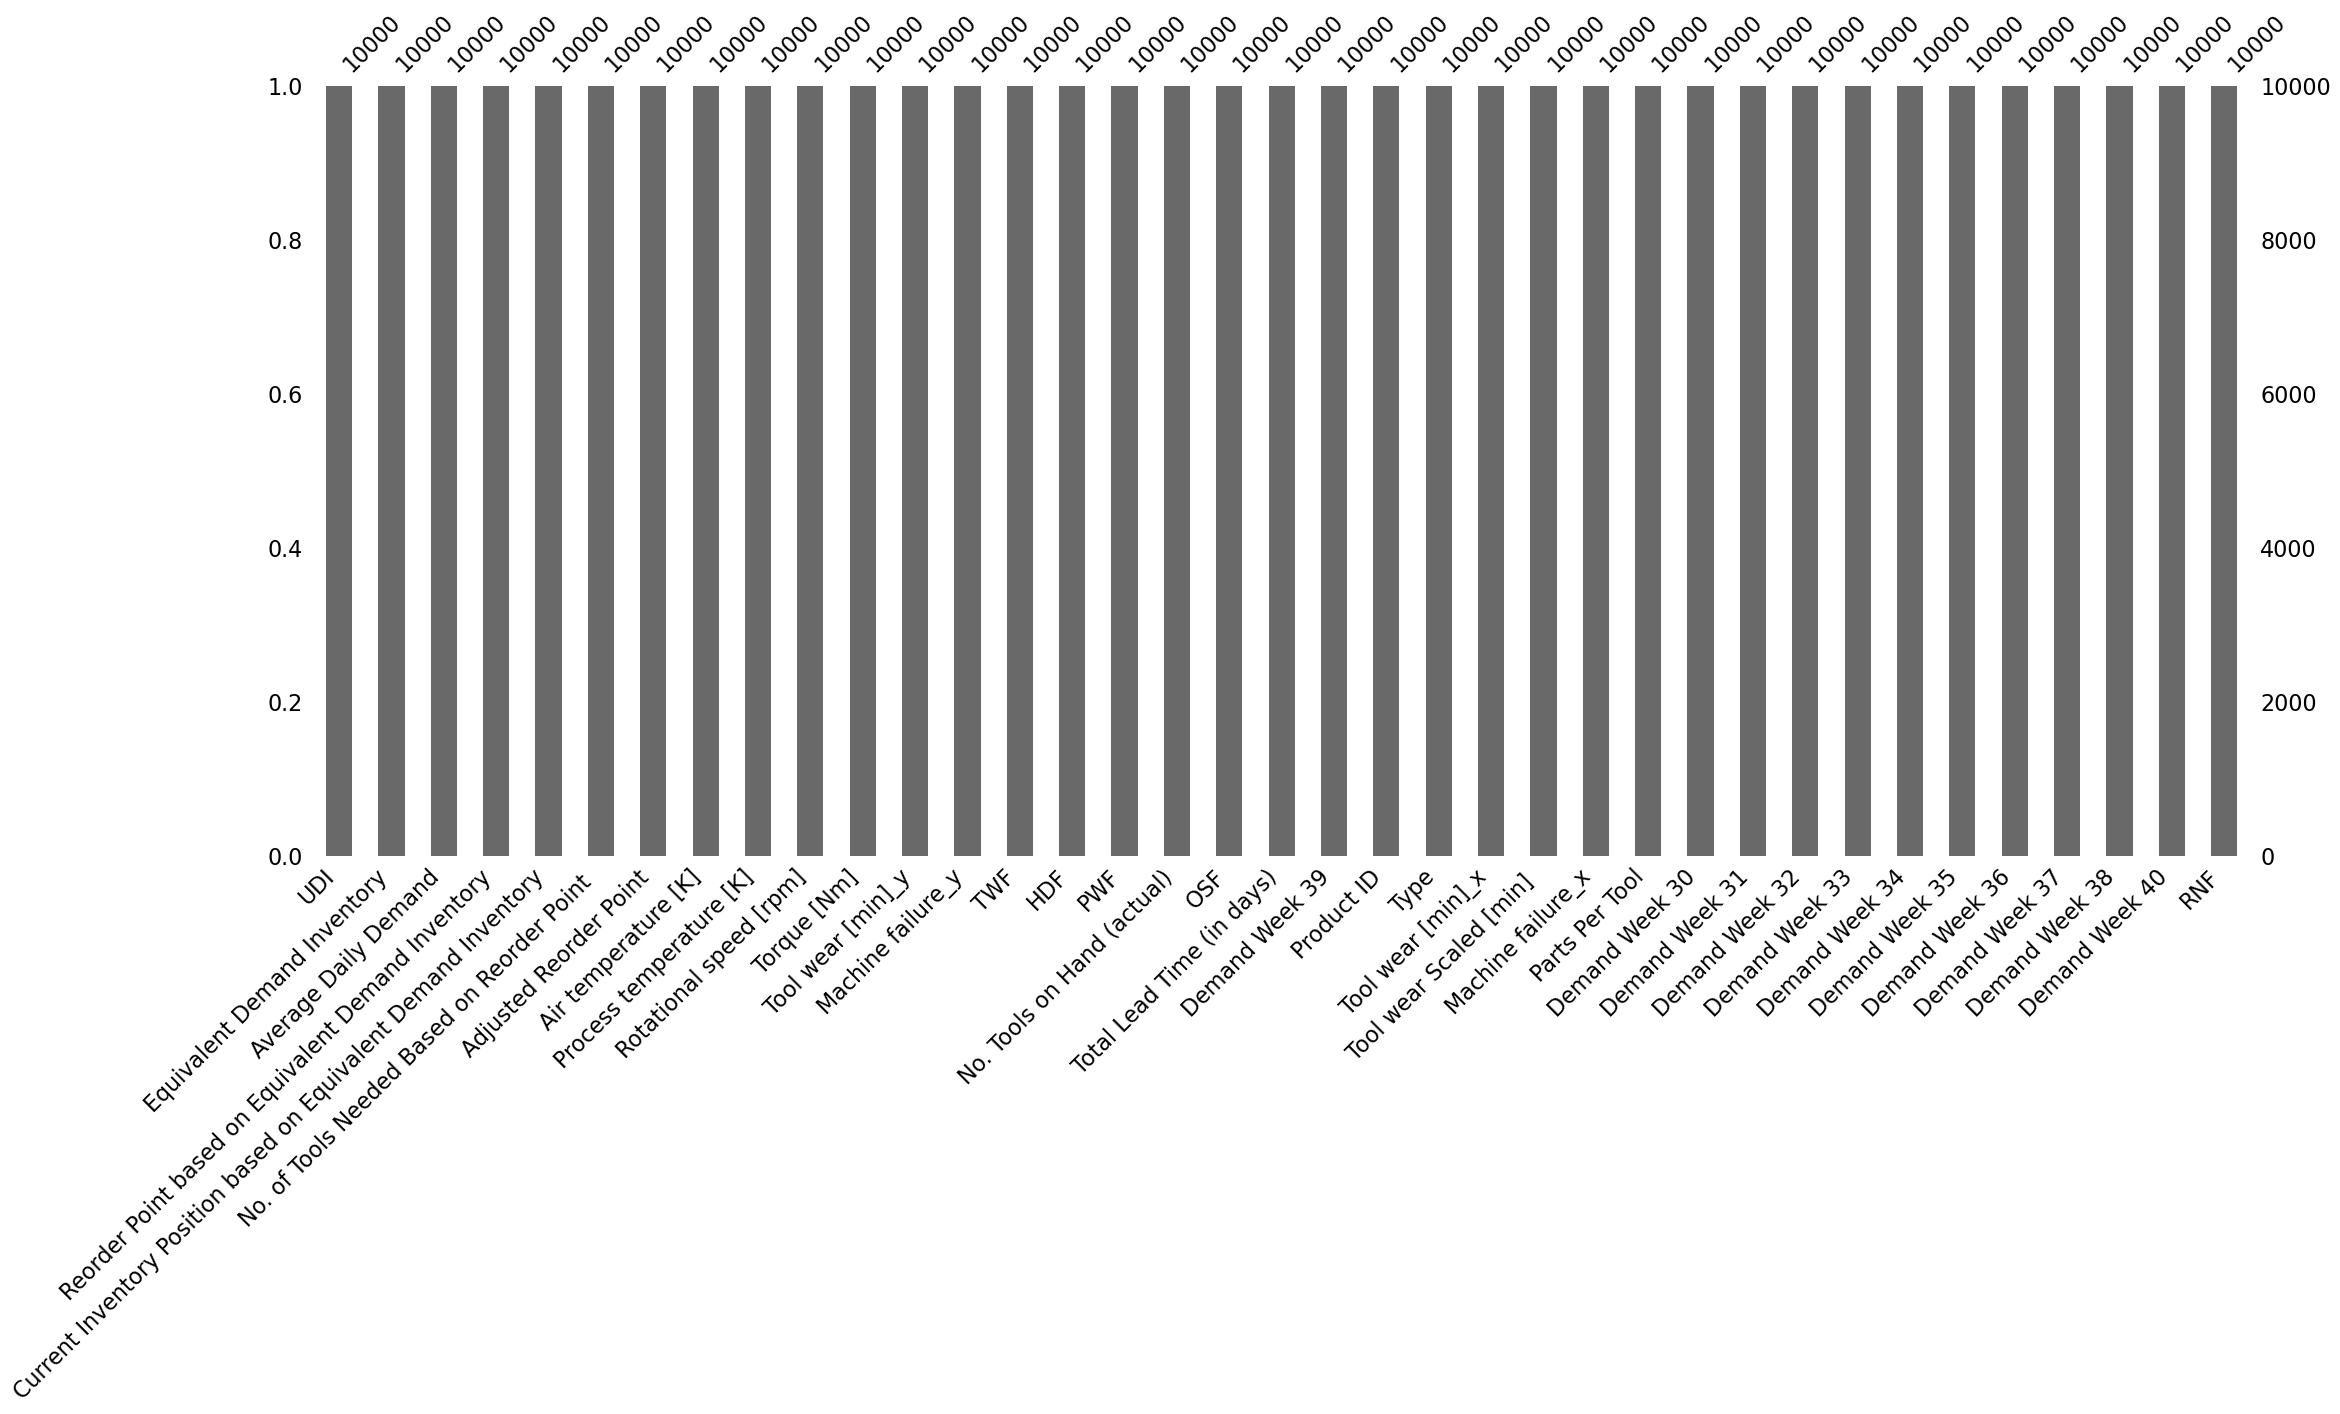

In [12]:
#ensure I pulled correct data and no missingness
import missingno as msno
import matplotlib.pyplot as plt
column_order = merged_data.isnull().sum().sort_values().index
msno.bar(merged_data[column_order])
plt.show()

In [13]:
print(merged_data.columns)

Index(['UDI', 'Product ID', 'Type', 'Tool wear [min]_x',
       'Tool wear Scaled [min] ', 'Machine failure_x', 'Parts Per Tool',
       'Demand Week 30', 'Demand Week 31', 'Demand Week 32', 'Demand Week 33',
       'Demand Week 34', 'Demand Week 35', 'Demand Week 36', 'Demand Week 37',
       'Demand Week 38', 'Demand Week 39', 'Demand Week 40',
       'Total Lead Time (in days)', 'No. Tools on Hand (actual)',
       'Equivalent Demand Inventory', 'Average Daily Demand',
       'Reorder Point based on Equivalent Demand Inventory',
       'Current Inventory Position based on Equivalent Demand Inventory',
       'No. of Tools Needed Based on Reorder Point ', 'Adjusted Reorder Point',
       'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]_y',
       'Machine failure_y', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [4]:
print(merged_data.dtypes)

#removed UDI, Type, Product ID from feature selection analysis due to data type 
#removed Tool wear [min]_x , Tool wear [min]_y since they are variants of the target variable 

UDI                                                                  int64
Product ID                                                          object
Type                                                                object
Tool wear [min]_x                                                    int64
Tool wear Scaled [min]                                               int64
Machine failure_x                                                    int64
Parts Per Tool                                                       int64
Demand Week 30                                                       int64
Demand Week 31                                                       int64
Demand Week 32                                                       int64
Demand Week 33                                                       int64
Demand Week 34                                                       int64
Demand Week 35                                                       int64
Demand Week 36           

In [5]:
#Feature selection 

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

selected_features = ['Machine failure_x', 'Parts Per Tool',
       'Demand Week 30', 'Demand Week 31', 'Demand Week 32', 'Demand Week 33',
       'Demand Week 34', 'Demand Week 35', 'Demand Week 36', 'Demand Week 37',
       'Demand Week 38', 'Demand Week 39', 'Demand Week 40',
       'Total Lead Time (in days)', 'No. Tools on Hand (actual)',
       'Equivalent Demand Inventory', 'Average Daily Demand',
       'Reorder Point based on Equivalent Demand Inventory',
       'Current Inventory Position based on Equivalent Demand Inventory',
       'No. of Tools Needed Based on Reorder Point ', 'Adjusted Reorder Point',
       'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]',
       'Machine failure_y', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

target = 'Tool wear Scaled [min] '

X = merged_data[selected_features]
y = merged_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor
estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator, and let it choose the number of features automatically
rfe = RFE(estimator)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected Features:")
for i, feature in enumerate(selected_features):
    if rfe.support_[i]:
        print("-", feature)

# Transform the data to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Print the shape of the resulting datasets
print("\nX_train_rfe shape:", X_train_rfe.shape)
print("X_test_rfe shape:", X_test_rfe.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Selected Features:
- Parts Per Tool
- Demand Week 30
- Demand Week 31
- Demand Week 32
- Demand Week 33
- Demand Week 34
- Demand Week 35
- Demand Week 36
- Demand Week 37
- Demand Week 39
- Demand Week 40
- No. Tools on Hand (actual)
- Average Daily Demand
- No. of Tools Needed Based on Reorder Point 
- Adjusted Reorder Point

X_train_rfe shape: (8000, 15)
X_test_rfe shape: (2000, 15)
y_train shape: (8000,)
y_test shape: (2000,)


In [6]:
#Linear Regression Analysis 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_rfe, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test_rfe)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 122418245.71876074
Root Mean Squared Error: 11064.277912216447
R-squared: 0.7063801803263088


In [8]:
#Cross Validation 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define a function to calculate RMSE (since cross_val_score by default uses negative MSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform cross-validation with RMSE as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(rmse))

# Print RMSE scores for each fold and the mean RMSE across all folds
print("Cross-Validation RMSE Scores:", scores)
print("Mean RMSE:", scores.mean())


Cross-Validation RMSE Scores: [11062.01849498 10239.66111718 10687.84807057  9774.8383211
 10979.93022778]
Mean RMSE: 10548.859246323424


In [7]:
#Use statsmodels to perform detailed analysis including p-values
#Use to answer research question / discuss hypothesis 

import statsmodels.api as sm

#Selected features
selected_feature_names = [
    'Parts Per Tool', 'Demand Week 30', 'Demand Week 31', 'Demand Week 32', 'Demand Week 33', 'Demand Week 34', 
    'Demand Week 35', 'Demand Week 36', 'Demand Week 37', 'Demand Week 39', 'Demand Week 40', 
    'No. Tools on Hand (actual)', 'Average Daily Demand', 'No. of Tools Needed Based on Reorder Point', 
    'Adjusted Reorder Point'
]

# Add a constant to the independent variables matrix for intercept
X_train_const = sm.add_constant(X_train_rfe)

# Fit OLS (Ordinary Least Squares) model
model_sm = sm.OLS(y_train, X_train_const)
results = model_sm.fit()

# Print summary with p-values
print(results.summary())

# Get coefficients and their associated feature names
coefficients = results.params[1:]  # Exclude the intercept
pvalues = results.pvalues[1:]      # Exclude the intercept's p-value

print("\nCoefficients:")
for i, (coef, pval) in enumerate(zip(coefficients, pvalues)):
    if i < len(selected_feature_names):
        feature_name = selected_feature_names[i]
        print(f"{feature_name}: {coef:.4f} (p-value: {pval:.4f})")
    else:
        print(f"Index {i} exceeds the length of selected_feature_names.")

# Interpretation
print("\nSignificance level (α) = 0.05")
print("P-values less than 0.05 indicate statistically significant results.")


                               OLS Regression Results                              
Dep. Variable:     Tool wear Scaled [min]    R-squared:                       0.711
Model:                                 OLS   Adj. R-squared:                  0.710
Method:                      Least Squares   F-statistic:                     1402.
Date:                     Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                             12:38:51   Log-Likelihood:                -85584.
No. Observations:                     8000   AIC:                         1.712e+05
Df Residuals:                         7985   BIC:                         1.713e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Entire dataset is merged_data with all features and target
X = merged_data[['Parts Per Tool', 'Demand Week 30', 'Demand Week 31', 'Demand Week 32', 'Demand Week 33', 
                 'Demand Week 34', 
    'Demand Week 35', 'Demand Week 36', 'Demand Week 37', 'Demand Week 39', 'Demand Week 40', 
    'No. Tools on Hand (actual)', 'Average Daily Demand', 'No. of Tools Needed Based on Reorder Point ', 
    'Adjusted Reorder Point']]
y = merged_data['Tool wear Scaled [min] ']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Make predictions using the entire dataset
predictions_full = model.predict(X)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Product ID': merged_data['Product ID'],  # Replace with actual identifier column
    'Predicted_Tool_wear_Scaled': predictions_full
})

# Optionally set to view all rows
pd.set_option('display.max_rows', None)

# Append Tool_Type column from merged_data to predictions_df
predictions_df['Type'] = merged_data['Type']

# Print predictions_df 
print(predictions_df)

     Product ID  Predicted_Tool_wear_Scaled Type
0        M14860                  538.658809    M
1        L47181                 -962.800533    L
2        L47182                 2254.241922    L
3        L47183                 4318.212668    L
4        L47184                 6733.095070    L
5        M14865                 4686.224561    M
6        L47186                -3046.074386    L
7        L47187                 4170.836875    L
8        M14868                 7406.787775    M
9        M14869                 5413.443149    M
10       H29424                 9965.754911    H
11       H29425                11648.333231    H
12       M14872                 8224.417303    M
13       M14873                13610.823800    M
14       L47194                 7127.071143    L
15       L47195                 6800.267855    L
16       M14876                14407.929188    M
17       M14877                12784.342254    M
18       H29432                17011.864961    H
19       M14879     

In [10]:
#model evaluation metrics for full predictions on full dataset 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions_full)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y, predictions_full)
print("R-squared:", r2)


Mean Squared Error: 116232582.2669682
Root Mean Squared Error: 10781.1215681379
R-squared: 0.7100346333787111


In [11]:
#Determine number of rows with negative tool wear in min

import numpy as np

# Assuming total dataset size is 10000 records
total_dataset_size = 10000

# Find indices of rows where predictions are negative
negative_indices = np.where(predictions_full < 0)[0]

# Calculate count of negative predictions
negative_count = len(negative_indices)

# Calculate percentage of negative predictions relative to total dataset
negative_percentage = (negative_count / total_dataset_size) * 100

# Display results
print(f"Number of rows with negative predictions: {negative_count} ({negative_percentage:.2f}% of total)")


Number of rows with negative predictions: 315 (3.15% of total)


In [12]:
print(predictions_df.columns)

Index(['Product ID', 'Predicted_Tool_wear_Scaled', 'Type'], dtype='object')


In [13]:
#determine the average predicted tool wear based on tool type 

# Group by Type and calculate average predicted tool wear
average_predicted_wear = predictions_df.groupby('Type')['Predicted_Tool_wear_Scaled'].mean()

# Convert series to DataFrame
average_predicted_wear_df = 
average_predicted_wear.reset_index().rename(columns={'Predicted_Tool_wear_Scaled': 'Average_Predicted_Tool_Wear'})

# Print or display the average_predicted_wear_df
print("Average Predicted Tool Wear by Tool Type:")
print(average_predicted_wear_df)


Average Predicted Tool Wear by Tool Type:
  Type  Average_Predicted_Tool_Wear
0    H                 30958.794098
1    L                 26867.104467
2    M                 29402.670242


In [14]:
#Replace negative predicted tool wear with the avg predicted tool wear based on tool type

import numpy as np
import pandas as pd

# Ensure 'Type' is the index in average_predicted_wear_df for easy lookup
average_predicted_wear_df.set_index('Type', inplace=True)

# Create a copy of predictions_df to make modifications
predictions_updated_df = predictions_df.copy()

# Function to apply the average based on 'Type' when the value is negative
def replace_with_average(row):
    if row['Predicted_Tool_wear_Scaled'] < 0:
        return average_predicted_wear_df.loc[row['Type'], 'Average_Predicted_Tool_Wear']
    else:
        return row['Predicted_Tool_wear_Scaled']

# Apply the function to replace negative values
predictions_updated_df['Predicted_Tool_wear_Scaled'] = predictions_updated_df.apply(replace_with_average, axis=1)

# Print the modified predictions_updated_df
print(predictions_updated_df)


     Product ID  Predicted_Tool_wear_Scaled Type
0        M14860                  538.658809    M
1        L47181                26867.104467    L
2        L47182                 2254.241922    L
3        L47183                 4318.212668    L
4        L47184                 6733.095070    L
5        M14865                 4686.224561    M
6        L47186                26867.104467    L
7        L47187                 4170.836875    L
8        M14868                 7406.787775    M
9        M14869                 5413.443149    M
10       H29424                 9965.754911    H
11       H29425                11648.333231    H
12       M14872                 8224.417303    M
13       M14873                13610.823800    M
14       L47194                 7127.071143    L
15       L47195                 6800.267855    L
16       M14876                14407.929188    M
17       M14877                12784.342254    M
18       H29432                17011.864961    H
19       M14879     

In [15]:
#Ensure no negative values in updated df

import numpy as np

# Find indices of rows where predictions are negative
negative_indices = np.where(predictions_updated_df['Predicted_Tool_wear_Scaled'] < 0)[0]

# Calculate count of negative predictions
negative_count = len(negative_indices)

# Calculate percentage of negative predictions relative to total dataset
total_dataset_size = len(predictions_updated_df)
negative_percentage = (negative_count / total_dataset_size) * 100

# Display results
print(f"Number of rows with negative predictions: {negative_count} ({negative_percentage:.2f}% of total)")


Number of rows with negative predictions: 0 (0.00% of total)


In [16]:
# Merge datasets on 'Product ID'
merged_data_with_predictions = pd.merge(merged_data, predictions_updated_df, on='Product ID', how='inner')

# Export merged dataset with predictions to a CSV file
output_file_path = '/Users/jasminemoniquecooper/Downloads/merged_data_with_updated_predictions.csv'
merged_data_with_predictions.to_csv(output_file_path, index=False)

print(f"Merged dataset with predictions exported to {output_file_path}")

Merged dataset with predictions exported to /Users/jasminemoniquecooper/Downloads/merged_data_with_updated_predictions.csv


In [17]:
print(merged_data_with_predictions.loc[merged_data_with_predictions['Product ID'] == 'H29425'])
#check against Tableau dashboaord to make sure info was imported properly 

    UDI Product ID Type_x  Tool wear [min]_x  Tool wear Scaled [min]   \
11   12     H29425      H                 29                    14500   

    Machine failure_x  Parts Per Tool  Demand Week 30  Demand Week 31  \
11                  0            2900           12355           17892   

    Demand Week 32  Demand Week 33  Demand Week 34  Demand Week 35  \
11           29725            1302            6468           20618   

    Demand Week 36  Demand Week 37  Demand Week 38  Demand Week 39  \
11            9583           15427           30152           10826   

    Demand Week 40  Total Lead Time (in days)  No. Tools on Hand (actual)  \
11            8156                         84                         866   

    Equivalent Demand Inventory  Average Daily Demand  \
11                      2511400           2954.618182   

    Reorder Point based on Equivalent Demand Inventory  \
11                                      248187.927273    

    Current Inventory Position based 